In [15]:
#Importing the necessary Python libraries and the dataset 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


iris = pd.read_csv('iris_flowers.csv')

#Display dataset
#iris

#Descriptive statistics of this dataset
#iris.describe()


In [16]:
#Data pre-processing
x = iris.drop(columns=['class'])
y = iris['class']

#Label Encoding - for encoding categorical features into numerical ones
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
#y #iris.target
#x #iris.data

In [17]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

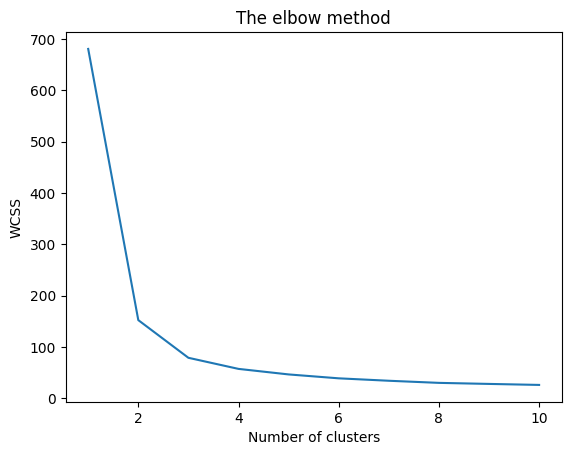

In [18]:
#Plot plot elbow
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [19]:
#Kmeans clustering
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x) #result

In [20]:
#Checking the results
pd.crosstab(y,y_kmeans)

col_0,0,1,2
row_0,,,
0,0,50,0
1,48,0,2
2,14,0,36


In [21]:
#Detailed classification report 
from sklearn.metrics import classification_report
print(classification_report(y,y_kmeans))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        50
           2       0.95      0.72      0.82        50

    accuracy                           0.24       150
   macro avg       0.32      0.24      0.27       150
weighted avg       0.32      0.24      0.27       150



In [22]:
#Save the model
import pickle
with open('Kmeans.pickle', 'wb') as f:pickle.dump(kmeans, f)